##### function to carry out histogram equalization

<BarContainer object of 256 artists>

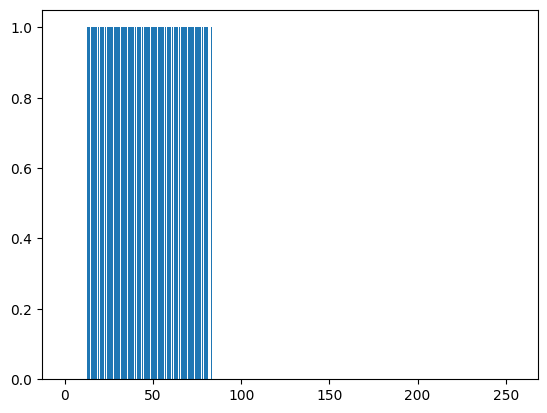

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\shells.tif" )
image1 = np.array(image)

histogram = {}
for i in range(0,256):
    if i in image1:
        histogram[i] =+ 1
    else:
        histogram[i] = 0
plt.bar(histogram.keys(),histogram.values())

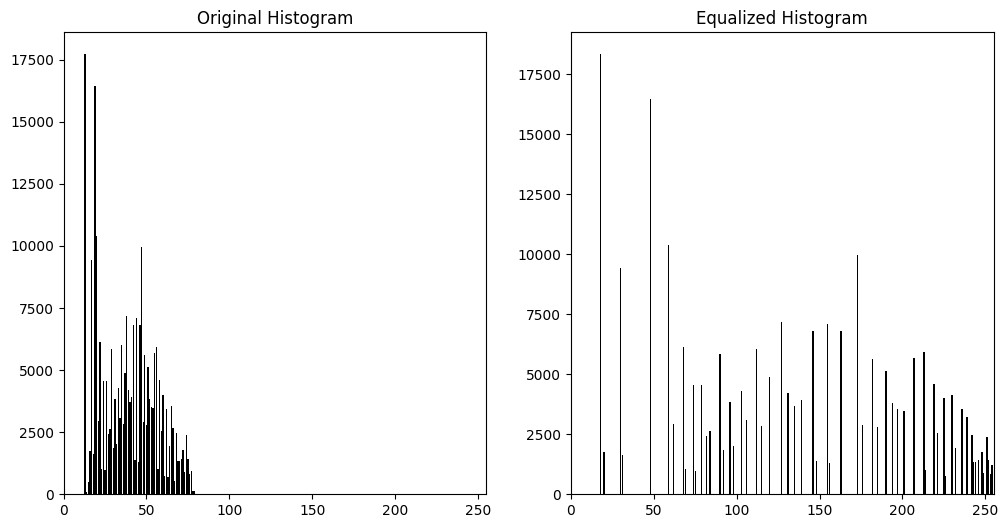

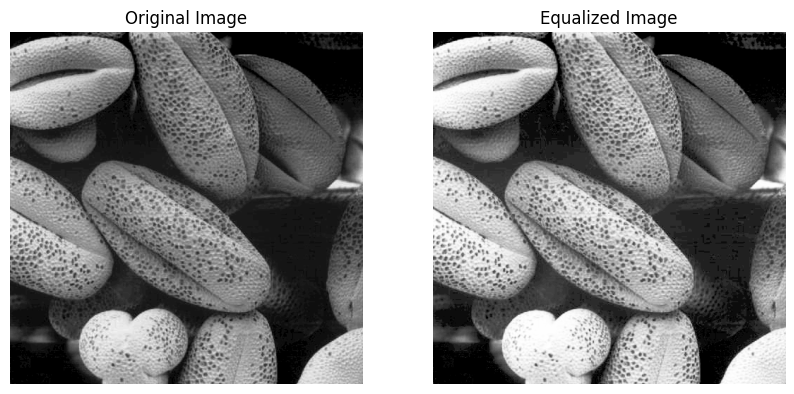

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image):
    """ Calculate the histogram """
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1
    return histogram

def equalize_histogram(image):
    """ Perform histogram equalization on an image. """
    # Calculate the histogram
    hist = calculate_histogram(image)
    
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(hist)

    # Normalize the CDF
    cdf_normalized = (cdf) * 255 / cdf.max()
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # Use the normalized CDF to map the original image pixels to equalized values
    equalized_image = cdf_normalized[image]
    
    return equalized_image, hist, calculate_histogram(equalized_image)

# Load the image in grayscale
image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\shells.tif", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("The specified image file was not found.")

# Perform histogram equalization
equalized_image, original_hist, equalized_hist = equalize_histogram(image)

# Visualization of the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(256), original_hist, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.bar(range(256), equalized_hist, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 255])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()
